In [37]:
import pandas as pd
from zipfile import ZipFile
import os
import numpy as np
from scipy import stats
data_path = os.path.join(os.getcwd(), "..", "data") 

In [38]:
# Zip File extraction and CSV retrieval 
for zip_file in [zip_file for zip_file in os.listdir(data_path) if zip_file.endswith(".zip")]: 
    with ZipFile(os.path.join(data_path, zip_file), "r") as zObject: 
        # Extract all members in a specific location 
        zObject.extractall(path = data_path)
zObject.close()

In [39]:
csv_path = os.path.join(data_path, "data") 
csv_filename = "trackLog-2024-apr-13_08-04-22.csv"
csv_filepath = os.path.realpath(os.path.join(csv_path, csv_filename))

In [40]:
# Lettura 
infinity_symbol = "∞"

GPSCols = [" Longitude", " Latitude", " Altitude", "GPS Speed (Meters/second)", "GPS Accuracy(m)", "GPS Bearing(°)", "GPS Satellites", " Horizontal Dilution of Precision", 
           " Bearing", " G(x)", " G(y)", " G(z)", " G(calibrated)"]
ConsumptionCols = ["Trip average Litres/100 KM(l/100km)", "Fuel Level (From Engine ECU)(%)"]
EngineCols = ["Engine RPM(rpm)", "Throttle Position(Manifold)(%)", "Intake Manifold Pressure(psi)", "Turbo Boost & Vacuum Gauge(psi)", "Intake Air Temperature(°C)", "Engine Coolant Temperature(°C)"]
KinCols = ["Acceleration Sensor(X axis)(g)", "Acceleration Sensor(Y axis)(g)", "Acceleration Sensor(Z axis)(g)", "Acceleration Sensor(Total)(g)", "Speed (OBD)(km/h)"]
DistCols = ["Trip Distance(km)", "Trip distance (stored in vehicle profile)(km)"]
TimeCols = ["GPS Time", " Device Time"]
VarCols = ["Barometric pressure (from vehicle)(psi)"]

cols = TimeCols+VarCols+DistCols+KinCols+EngineCols+ConsumptionCols+GPSCols

df = pd.read_csv(csv_filepath, usecols=cols, na_values="-")
df = df.replace(infinity_symbol, np.inf)
df = df[df["GPS Time"] != "GPS Time"]
df["GPS Time"] = pd.to_datetime(df["GPS Time"], format="%a %b %d %H:%M:%S GMT%z %Y")
df[" Device Time"] = pd.to_datetime(df[" Device Time"], format="%d-%b-%Y %H:%M:%S.%f")
df.columns

C:\Users\cosim\AppData\Local\Temp\ipykernel_7428\1215503602.py:15: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,13,15,16,17,18,19,20,22,26,27,28,29,49,50,51,52,53,54,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filepath, usecols=cols, na_values="-")


Index(['GPS Time', ' Device Time', ' Longitude', ' Latitude',
       'GPS Speed (Meters/second)', ' Horizontal Dilution of Precision',
       ' Altitude', ' Bearing', ' G(x)', ' G(y)', ' G(z)', ' G(calibrated)',
       'Trip average Litres/100 KM(l/100km)', 'Trip Distance(km)',
       'Trip distance (stored in vehicle profile)(km)', 'Engine RPM(rpm)',
       'GPS Accuracy(m)', 'GPS Bearing(°)', 'GPS Satellites',
       'Fuel Level (From Engine ECU)(%)', 'Throttle Position(Manifold)(%)',
       'Barometric pressure (from vehicle)(psi)',
       'Intake Manifold Pressure(psi)', 'Turbo Boost & Vacuum Gauge(psi)',
       'Acceleration Sensor(X axis)(g)', 'Acceleration Sensor(Y axis)(g)',
       'Acceleration Sensor(Z axis)(g)', 'Acceleration Sensor(Total)(g)',
       'Intake Air Temperature(°C)', 'Engine Coolant Temperature(°C)',
       'Speed (OBD)(km/h)'],
      dtype='object')

In [41]:
for col in df.columns: 
    print(f"{col}: n. NaN: {df[col].isna().sum()}")


GPS Time: n. NaN: 7
 Device Time: n. NaN: 0
 Longitude: n. NaN: 7
 Latitude: n. NaN: 7
GPS Speed (Meters/second): n. NaN: 7
 Horizontal Dilution of Precision: n. NaN: 7
 Altitude: n. NaN: 7
 Bearing: n. NaN: 7
 G(x): n. NaN: 0
 G(y): n. NaN: 0
 G(z): n. NaN: 0
 G(calibrated): n. NaN: 0
Trip average Litres/100 KM(l/100km): n. NaN: 0
Trip Distance(km): n. NaN: 0
Trip distance (stored in vehicle profile)(km): n. NaN: 0
Engine RPM(rpm): n. NaN: 0
GPS Accuracy(m): n. NaN: 0
GPS Bearing(°): n. NaN: 0
GPS Satellites: n. NaN: 0
Fuel Level (From Engine ECU)(%): n. NaN: 0
Throttle Position(Manifold)(%): n. NaN: 0
Barometric pressure (from vehicle)(psi): n. NaN: 0
Intake Manifold Pressure(psi): n. NaN: 0
Turbo Boost & Vacuum Gauge(psi): n. NaN: 0
Acceleration Sensor(X axis)(g): n. NaN: 0
Acceleration Sensor(Y axis)(g): n. NaN: 0
Acceleration Sensor(Z axis)(g): n. NaN: 0
Acceleration Sensor(Total)(g): n. NaN: 0
Intake Air Temperature(°C): n. NaN: 0
Engine Coolant Temperature(°C): n. NaN: 0
Speed (

In [42]:
df = df.dropna()

In [43]:
df[GPSCols] = df[GPSCols].astype(float)
df[ConsumptionCols] = df[ConsumptionCols].astype(float)
df[EngineCols] = df[EngineCols].astype(float)
df[KinCols] = df[KinCols].astype(float)
df[DistCols] = df[DistCols].astype(float)
df[VarCols] = df[VarCols].astype(float)
df.fillna(0)
df.to_pickle(os.path.join(data_path, "processed.pkl"))

<Axes: xlabel='GPS Time', ylabel='GPS Speed (Meters/second)'>

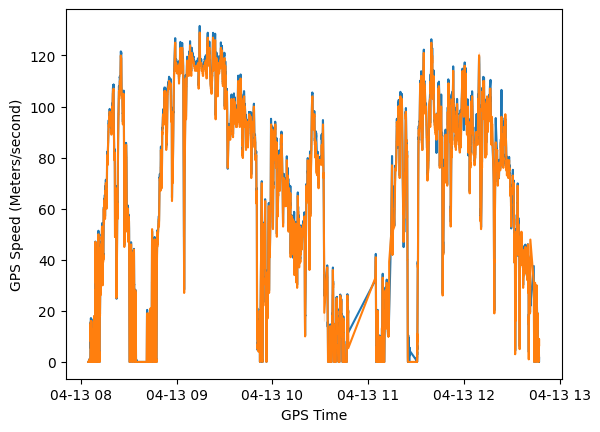

In [44]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, axs = plt.subplots()
sns.lineplot(x = df["GPS Time"], y = df["GPS Speed (Meters/second)"]*3.6)
sns.lineplot(x = df["GPS Time"], y = df["Speed (OBD)(km/h)"])

13.231844565277042


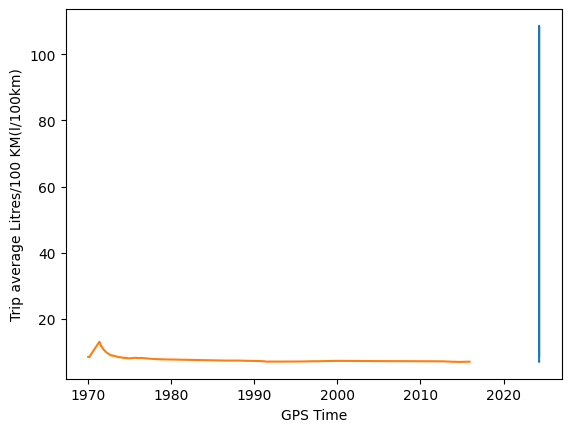

In [59]:
fig, axs = plt.subplots()
sns.lineplot(x = df["GPS Time"], y = df["Trip average Litres/100 KM(l/100km)"])

average_cons = df["Trip average Litres/100 KM(l/100km)"].dropna()
# Calculate the z-score for consumption
z = np.abs(stats.zscore(average_cons))

# Identify outliers as students with a z-score greater than 3
threshold = 1
print(100/average_cons[z<threshold].mean())


Text(0.5, 1.0, 'Correlation Matrix')

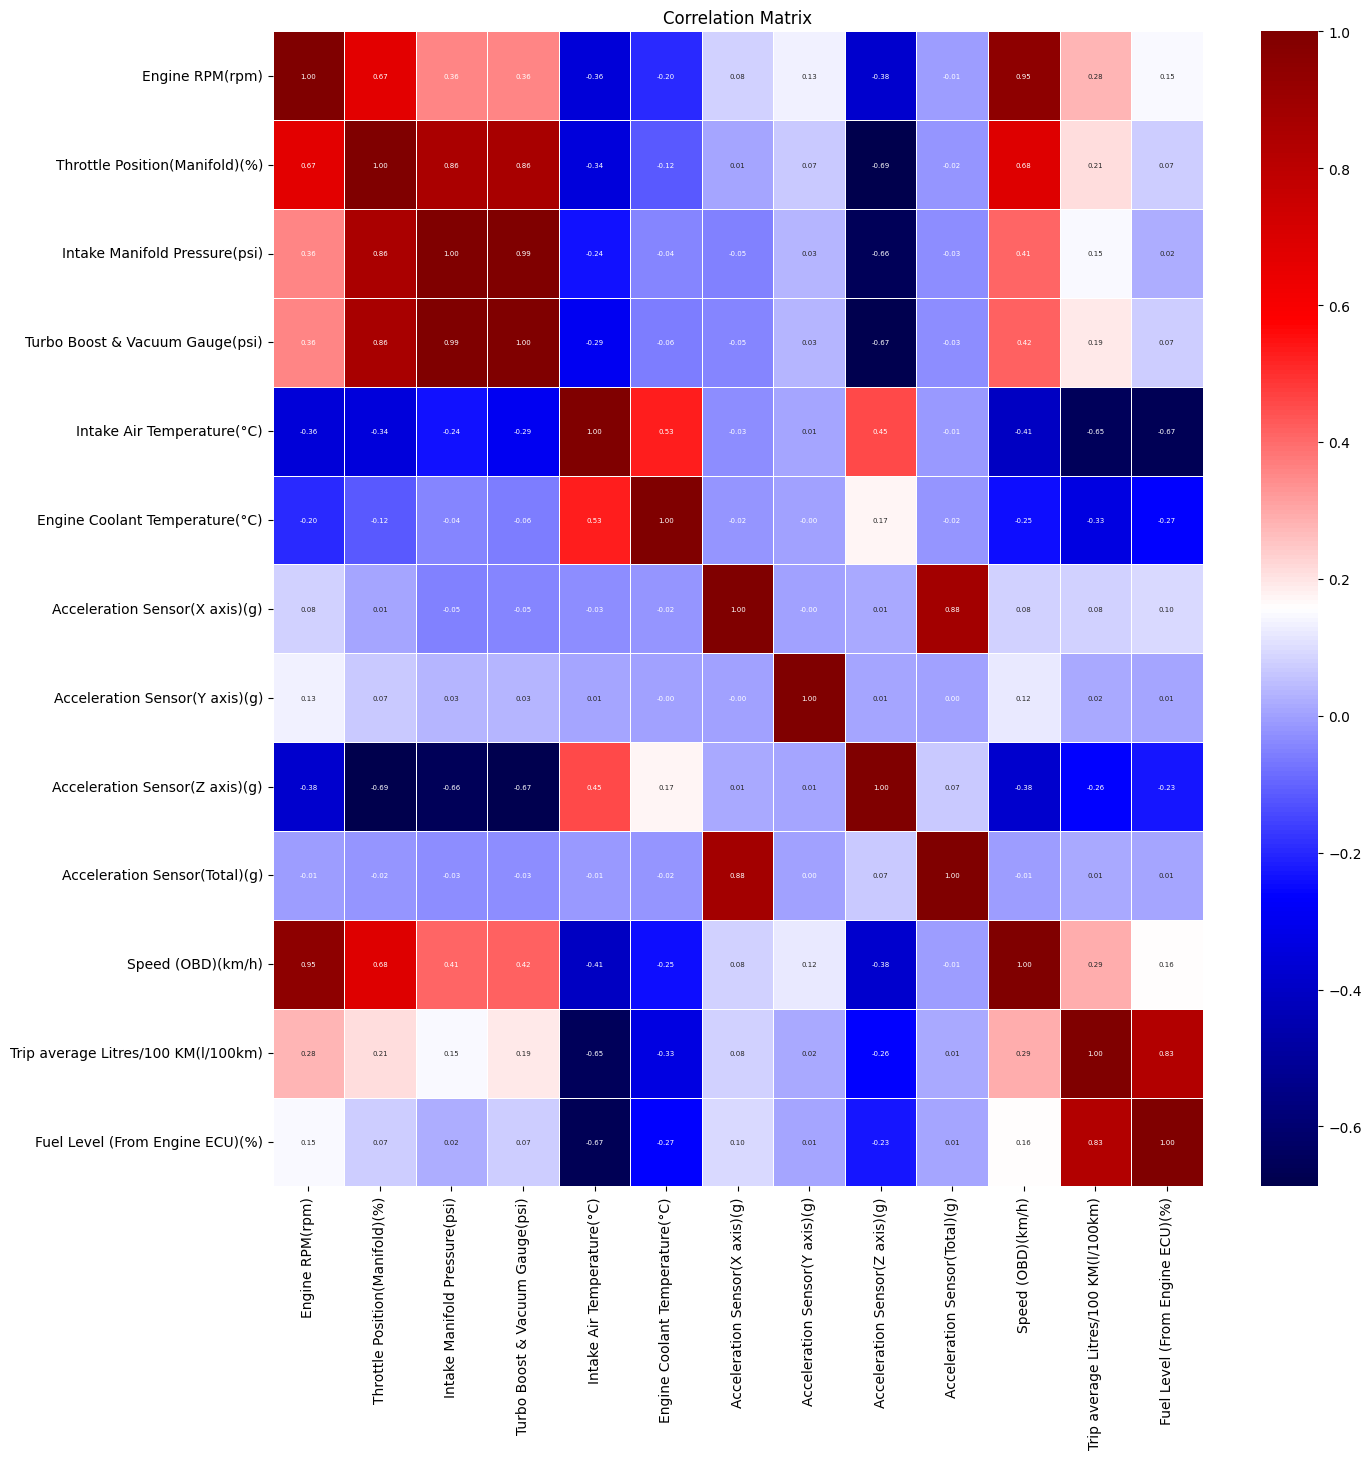

In [46]:

corr_matrix = df[EngineCols+KinCols+ConsumptionCols].corr(method = "spearman")
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot = True, cmap = "seismic", fmt=".2f", linewidths=0.5,annot_kws={'fontsize': 5})
plt.title("Correlation Matrix") 
